In [1]:
# Import pymsg

import sys
import os
sys.path.insert(0, os.path.join(os.environ['MSG_DIR'], 'lib'))
import pymsg
from scipy.constants import c, Planck

# Import standard modules and configure them

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 16})

In [ ]:
# Load the SpecGrid

specgrid = pymsg.SpecGrid('sg-demo.h5')

In [3]:
# Inspect grid parameters

print('Grid parameters:')

for label in specgrid.axis_labels:
   print(f'  {label} ({specgrid.axis_min[label]} -> {specgrid.axis_max[label]})')

print(f'  lam ({specgrid.lam_min} -> {specgrid.lam_max})')

Grid parameters:
  logT (3.5440680443502757 -> 4.698970004336019)
  logg (0.0 -> 5.0)
  lam (2449.9999999999995 -> 12542.062866127439)


In [4]:
# Set atmosphere parameters dict

dx = {'logT': np.log10(9940.), 'logg': 4.33}

In [5]:
# Set up the wavelength abscissa

lam_min = 3000.
lam_max = 7000.

lam = np.linspace(lam_min, lam_max, 501)

lam_c = 0.5*(lam[1:] + lam[:-1])

Text(0, 0.5, '$F_{\\lambda}\\ ({\\rm erg\\,cm^{-2}\\,s^{-1}}\\,\\AA^{-1})$')

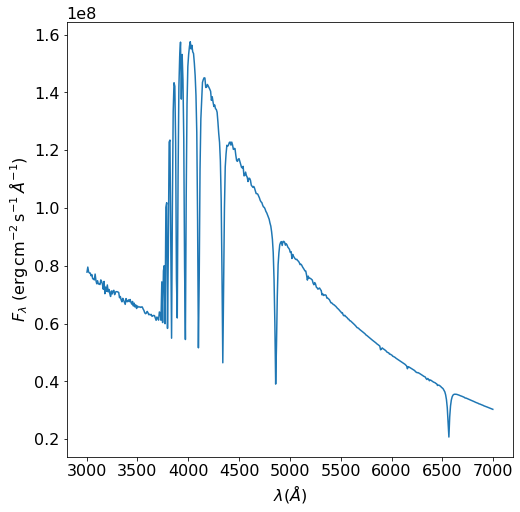

In [6]:
# Evaluate the flux

F_lam = specgrid.flux(dx, lam)

# Plot

plt.figure(figsize=[8,8])
plt.plot(lam_c, F_lam)

plt.xlabel(r'$\lambda ({\AA})$')
plt.ylabel(r'$F_{\lambda}\ ({\rm erg\,cm^{-2}\,s^{-1}}\,\AA^{-1})$')

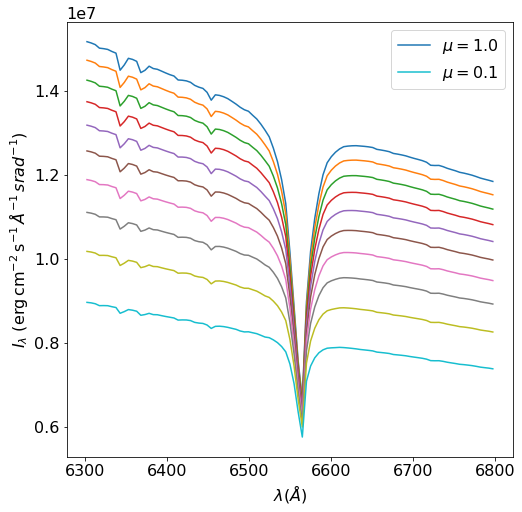

In [7]:
# Set up the wavelength abscissa

lam_min = 6300.
lam_max = 6800.

lam = np.linspace(lam_min, lam_max, 100)

lam_c = 0.5*(lam[1:] + lam[:-1])

# Loop over mu

plt.figure(figsize=[8,8])

for mu in np.linspace(1.0, 0.1, 10):

    # Evaluate the intensity

    I_lam = specgrid.intensity(dx, mu, lam)

    # Plot

    if mu==0.1 or mu==1.0:
        label=r'$\mu={:3.1f}$'.format(mu)
    else:
        label=None

    plt.plot(lam_c, I_lam, label=label)

plt.xlabel(r'$\lambda ({\AA})$')
plt.ylabel(r'$I_{\lambda}\ ({\rm erg\,cm^{-2}\,s^{-1}}\,\AA^{-1}\,srad^{-1})$')

plt.legend()

In [8]:
# Set up the photgrids

photgrid_U = pymsg.PhotGrid('sg-demo.h5', 'pb-Generic-Johnson.U-Vega.h5')
photgrid_B = pymsg.PhotGrid('sg-demo.h5', 'pb-Generic-Johnson.B-Vega.h5')
photgrid_V = pymsg.PhotGrid('sg-demo.h5', 'pb-Generic-Johnson.V-Vega.h5')

# Set up the radius and distance

R = 1.711 * 6.955E10
d = 2.670 * 3.0857E18

U = -2.5*np.log10(photgrid_U.flux(dx)*R**2/d**2)
B = -2.5*np.log10(photgrid_B.flux(dx)*R**2/d**2)
V = -2.5*np.log10(photgrid_V.flux(dx)*R**2/d**2)

print(f'V={V}, U-B={U-B}, B-V={B-V}')

V=-1.4462920877904226, U-B=-0.06161627503201794, B-V=0.0031857713586365133


Text(0, 0.5, '$F_{\\lambda}\\ (photon\\,cm^{-2}\\,s^{-1}}\\,\\AA^{-1})$')

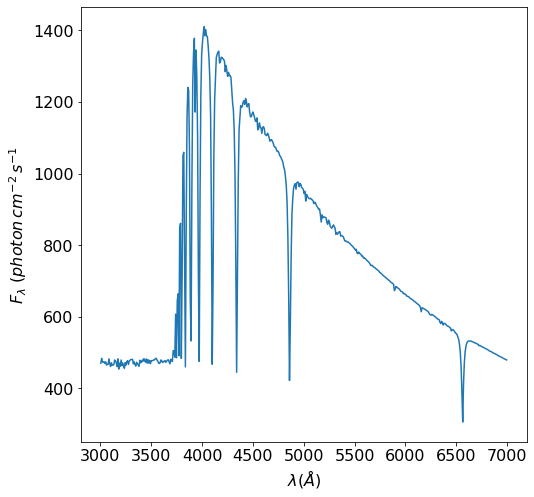

In [9]:
# Vega calibration

# Set atmosphere parameters dict

dx = {'logT': np.log10(9602), 'logg': 4.1}

lam_min = 3000
lam_max = 7000
 
lam = lam = np.linspace(lam_min, lam_max, 501)
lam_c = 0.5*(lam[1:] + lam[:-1])

# Set up the radius and distance

R = 2.362 * 6.955E10
d = 7.68 * 3.0857E18

# Eval flux

F_lam = specgrid.flux(dx, lam)*(R/d)**2
nu = (c*1E2)/(lam_c*1E-8)
F_phot = F_lam/(Planck*1E7*nu)

# Plot

plt.figure(figsize=[8,8])
#plt.plot(lam_c, F_lam)
plt.plot(lam_c, F_phot)


plt.xlabel(r'$\lambda ({\AA})$')
plt.ylabel(r'$F_{\lambda}\ (photon\,cm^{-2}\,s^{-1}}\,\AA^{-1})$')